# Exploratory Data Analysis

### This dataset *movies_full.csv* is downloaded to GitHub: https://github.com/nastazya/Movies-analytics/tree/master/data

In [1]:
# import the library
%matplotlib inline

import ast
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 24)

In [2]:
df = pd.read_csv('data/movies_full_with_outliers.csv')
df['release_date'] = pd.to_datetime(df['release_date'])
print(df.dtypes)

id                               int64
title                           object
budget                           int64
revenue                        float64
release_date            datetime64[ns]
popularity                     float64
vote_average                   float64
genres                          object
production_companies            object
cast                            object
keywords                        object
dtype: object


In [3]:
#Setting cast, production_companies, genres and keywords types to a list of dictionaries

df['genres'] = df['genres'].astype(str)
df['production_companies'] = df['production_companies'].astype(str)
df['cast'] = df['cast'].astype(str)
df['keywords'] = df['keywords'].astype(str)

df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x))
df['cast'] = df['cast'].apply(lambda x: ast.literal_eval(x))
df['keywords'] = df['keywords'].apply(lambda x: ast.literal_eval(x))

#checking results
cell = df['genres'][100]
print('\nGenres cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['production_companies'][100]
print('\nProduction_companies cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['cast'][100]
print('\nCast cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['keywords'][100]
print('\nKeywords cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))


Genres cell:  <class 'list'> . 
Cell[0]:  {'id': 16, 'name': 'Animation'} :  <class 'dict'>

Production_companies cell:  <class 'list'> . 
Cell[0]:  {'name': 'Steve Krantz Productions', 'id': 5067} :  <class 'dict'>

Cast cell:  <class 'list'> . 
Cell[0]:  {'cast_id': 2, 'character': 'Michael Corleone', 'credit_id': '52fe44289251416c91006c3f', 'gender': 2, 'id': 936451, 'name': 'Joseph Kaufmann', 'order': 0, 'profile_path': None} :  <class 'dict'>

Keywords cell:  <class 'list'> . 
Cell[0]:  {'id': 293, 'name': 'female nudity'} :  <class 'dict'>


In [4]:
df.head(5)

,id,title,budget,revenue,release_date,popularity,vote_average,genres,production_companies,cast,keywords
0,36523,Felix The Cat: The Movie,9000000,1964253.00,1988-10-01,0.03,3.70,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...","[{'name': 'Pannónia Filmstúdió', 'id': 48669},...","[{'cast_id': 1, 'character': 'Felix the Cat (V...","[{'id': 9820, 'name': 'alternate dimension'}, ..."
1,68351,Sankofa,1000000,2691899.00,1993-05-28,0.05,6.90,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Channel Four Films', 'id': 181}, {'...","[{'cast_id': 6, 'character': 'Sankofa', 'credi...","[{'id': 409, 'name': 'africa'}, {'id': 2831, '..."
2,285908,The Last Breath,3800000,559298.00,1999-03-25,0.07,4.00,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...","[{'name': 'Lions Gate Films', 'id': 35}]","[{'cast_id': 0, 'character': 'Lauren Vaillanco...","[{'id': 10714, 'name': 'serial killer'}]"
3,121173,Voracious,11178,34659.00,2012-09-05,0.08,8.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'APT Entertainment', 'id': 8355}, {'...","[{'cast_id': 16, 'character': 'Rene', 'credit_...","[{'id': 4694, 'name': 'staged death'}, {'id': ..."
4,110669,Wabash Avenue,2115000,2039000.00,1950-03-31,0.11,7.00,"[{'id': 10402, 'name': 'Music'}]",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'cast_id': 1004, 'character': 'Ruby Summers'...","[{'id': 4344, 'name': 'musical'}, {'id': 4497,..."


In [5]:
#Extra adjustments for the points discovered later during the process

#replace FRF budget by USD
df.loc[df['id'] == 10656, ['budget']] = 25974
print(df.loc[df['id'] == 10656, ['title']])

#wrong revenue
df.loc[df['id'] == 9838, ['revenue']] = 15057465
print(df.loc[df['id'] == 9838, ['title']])

       title
2134  Subway
                     title
1242  King Solomon's Mines


In [24]:
# Analize release date
# We see that there is a strong tendency of grouth movies produced every year
df['year'] = df['release_date'].dt.year
df['year_month'] = pd.to_datetime(df['release_date']).dt.to_period('M')
df = df[df['year']>=1980]

Number of Movies in each genre:
11   Foreign
32   Western
34   Documentary
90   Music
105   War
131   History
211   Animation
253   Mystery
309   Fantasy
315   Horror
343   Family
345   Science Fiction
488   Crime
544   Romance
571   Adventure
838   Action
910   Thriller
1038   Comedy
1479   Drama
Number of genres:  19
[0.0, 1.0, 1.0, 3.0, 3.0, 4.0, 7.0, 8.0, 10.0, 10.0, 11.0, 11.0, 16.0, 18.0, 19.0, 27.0, 29.0, 34.0, 48.0]


([<matplotlib.axis.XTick at 0x21d1fd33400>,
 <a list of 19 Text xticklabel objects>)

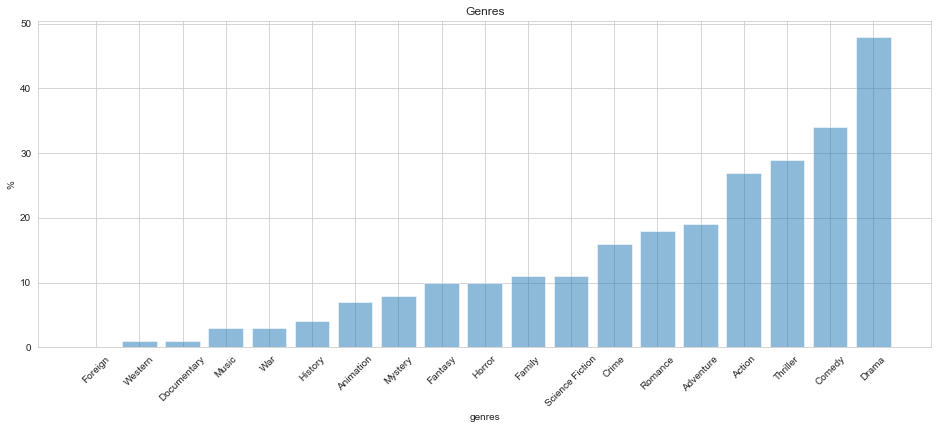

In [37]:
# Analize genres
#There are 20 genres. In our dataset there is only one TV Show and 2287 Dramas (highest number og movies in Drama)
df = df[df['year']>=1997]
l=[]
for i, item in enumerate(df['genres']):
    for cell in item:
        l.append(cell['name'])
genres_all = np.array(l) 
g_name, g_count = np.unique(genres_all, return_counts=True)
genres = zip(g_name, g_count) # list of Unique Values along with occurrence Count
genres = list(genres)
genres = sorted(genres, key = lambda x: x[1])
print('Number of Movies in each genre:')
for i, elem in enumerate(genres):
    print(genres[i][1], ' ', genres[i][0])
    g_name[i] = elem[0]
    g_count[i] = elem[1]
print('Number of genres: ', len(genres))

# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Genres')
plt.xlabel('genres')
plt.ylabel('%')
y_pos = range(len(g_name))
g_count_pers = [round(g_count[x]*100/df['id'].count()) for x in range(len(g_count))]
print(g_count_pers)
plt.bar(y_pos, g_count_pers, align='center', alpha=0.5)
plt.xticks(y_pos, g_name, rotation=45)


Correlation between popularity and revenue: 

             popularity  revenue
popularity        1.00     0.54
revenue           0.54     1.00


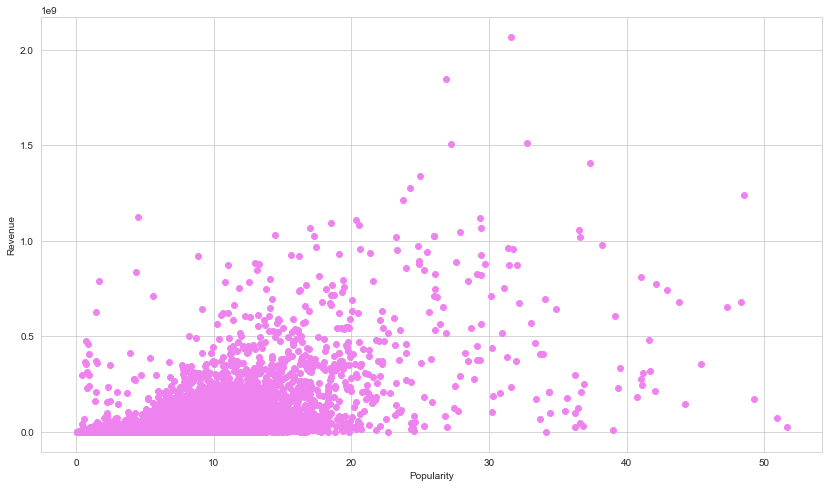

In [8]:
# Revenue VS Popularity

budget_year = df.groupby(by='year')['popularity'].sum()
#print('Total budget per year:\n', budget_year_u.sort_values(ascending=False))
revenue_year = df.groupby(by='year')['revenue'].sum()
#print('Total revenue per year:\n', revenue_year_u.sort_values(ascending=False))



#Plot scatter
plt.figure(figsize=(14,8))
plt.plot(df['popularity'], df['revenue'], 'o', color='violet')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

print('Correlation between popularity and revenue: \n\n', df[['popularity','revenue']].corr())

In [22]:
#Extracting list of genres
l=[]
for i, item in enumerate(df['genres']):
    for cell in item:
        l.append(cell['name'])
g_name, g_count = np.unique(np.array(l), return_counts=True)

#-----------------------------------------------------------------------------
#Extracting list of actors
l=[]
for i, item in enumerate(df['cast']):
    for cell in item:
        l.append(cell['name'])
a_name, a_count = np.unique(np.array(l), return_counts=True)
print('Number of Actors: ', len(a_name))
idx=[]
for i, item  in enumerate(a_name):
    if (item == 'Kar') | (item == 'George') | (a_name[i] == 'Mario') | (a_name[i] == 'Jack') | (a_name[i] == 'Charle') | (a_name[i] == 'Charlie') | (a_name[i] == 'Mars') | (a_name[i] == 'Terry') | (a_name[i] == 'King') | (a_name[i] == 'Sim') | (a_name[i] == 'Elli') | (a_name[i] == 'Carlos') | (a_name[i] == 'Sandra') | (a_name[i] == 'Justin') | (a_name[i] == 'Shane') | (a_name[i] == 'Angela') | (a_name[i] == 'Eve') | (a_name[i] == 'Foster') | (a_name[i] == 'Take') | (a_name[i] == 'Andrea') | (a_name[i] == 'Ade') | (a_name[i] == 'Tiffany') | (a_name[i] == 'Zoë'):
        idx.append(i)
    if item == 'Jodie Foster':
        print(item)
a_name = np.delete(a_name, idx)
a_count = np.delete(a_count, idx)

print('Number of Actors: ', len(a_name))
    

Number of Actors:  61552
Jodie Foster
Number of Actors:  61530


In [23]:
# Show four most popular genres the four last decades

#------------------------------------------------------------------------------
# Function that takes dataframe and returns percentages of movie popularity and revenue in every genre
def movie_genre(df_10):
    # Extracting mean of popularity of each genre into votes
    index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
    votes = []
    revenue=[]
    for i, item in enumerate(g_name):
        votes.append(df_10.iloc[index_extractor(df_10, 'genres', item),:]['popularity'].sum())
        revenue.append(df_10.iloc[index_extractor(df_10, 'genres', item),:]['revenue'].sum())
        
    # Calculating percentage
    total_v = np.sum(votes)
    total_r = np.sum(revenue)
    
    for i in range(len(votes)):
        votes[i] = votes[i]/total_v*100
        revenue[i] = revenue[i]/total_r*100

    # Zip and Sort by popularity percentage 
    sorted_genres = sorted(list(zip(g_name, votes, g_count, revenue)), key = lambda x: x[3], reverse = True)
    return sorted_genres

#-------------------------------------------------------------------------------
# Taking 2010-2017
df_10 = df[(df['year']>=2010) & (df['year']<2017)]
g_v_c_1 = movie_genre(df_10)
print('2010-2017: ')
top_1=[]
for i in range(4): 
    top_1.append(g_v_c_1[i][0])
    print(g_v_c_1[i][0], ': ', round(g_v_c_1[i][1],2), '%; revenue: ', round(g_v_c_1[i][3],2))
    

#Creating list of lists of 10 most popular actors in each genre in top_1
index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
a_1=[]
for i, genre in enumerate(top_1):
    df_temp = df_10.iloc[index_extractor(df_10, 'genres', genre),:]
    a_pop = []
    a_rev = []
    for actor in a_name:
        a_pop.append(df_temp.iloc[index_extractor(df_temp, 'cast', actor),:]['popularity'].sum())
        a_rev.append(df_temp.iloc[index_extractor(df_temp, 'cast', actor),:]['revenue'].sum())
    sorted_actors = sorted(list(zip(a_name, a_pop, a_count, a_rev)), key = lambda x: x[1], reverse = True)
    a_all = sorted_actors[0:10]
    #a_temp_10 = a_temp[0:10]
    print(genre, ': \n', a_all, '\n')
    
a_1.append(a_all)

#-------------------------------------------------------------------------------


2010-2017: 
Adventure :  9.64 %; revenue:  16.03
Action :  12.28 %; revenue:  14.91
Comedy :  11.36 %; revenue:  9.9
Drama :  16.6 %; revenue:  9.07
Adventure : 
 [('Stan Lee', 310.358408, 24, 8078975034.0), ('Idris Elba', 269.435391, 25, 7719816457.0), ('Samuel L. Jackson', 240.44414500000002, 67, 4639080315.0), ('Chris Hemsworth', 208.78098, 17, 4299408276.0), ('Zoë', 181.236582, 1, 3181933921.0), ('Toby Jones', 178.508646, 25, 5080627980.0), ('Lasco Atkins', 177.32550400000002, 13, 3127626814.0), ('Fred Tatasciore', 176.153872, 21, 6695197641.0), ('Simon Pegg', 175.41123800000003, 22, 6427106363.0), ('Michael Caine', 165.655012, 36, 3312387730.0)] 

Action : 
 [('Stan Lee', 310.358408, 24, 8078975034.0), ('Samuel L. Jackson', 234.847013, 67, 4760577510.0), ('Chris Hemsworth', 223.45547700000003, 17, 4267010192.0), ('Idris Elba', 208.82121400000003, 25, 3520271371.0), ('Morgan Freeman', 195.22895600000004, 55, 2619744993.0), ('Liam Neeson', 179.376577, 49, 3166867384.0), ('Jason Stat

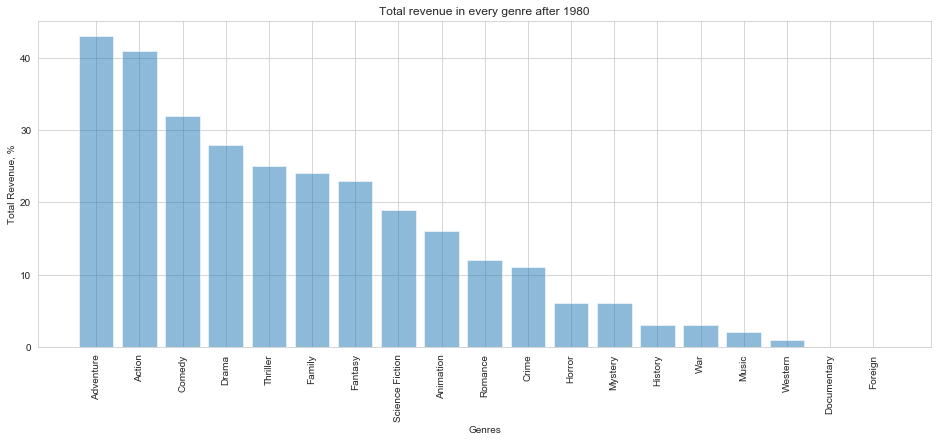

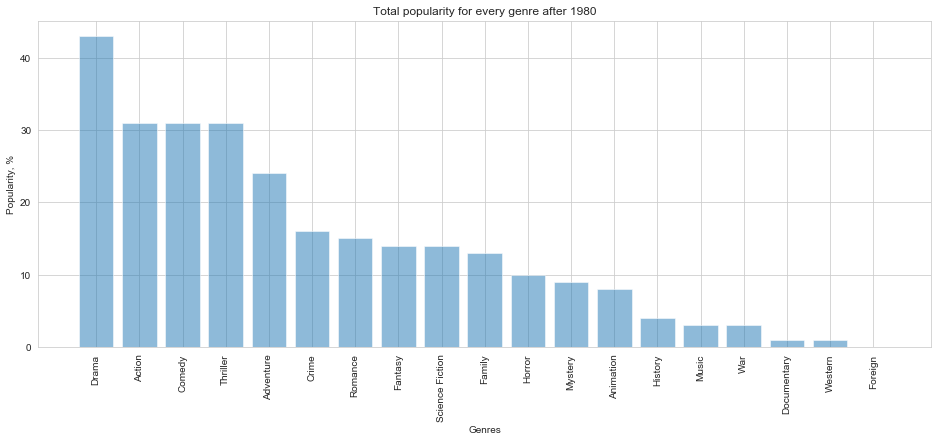

In [41]:
# Show total revenues for each genre
df_t = df


#Extracting list of genres
l=[]
for i, item in enumerate(df['genres']):
    for cell in item:
        l.append(cell['name'])
g_name, g_count = np.unique(np.array(l), return_counts=True)

#------------------------------------------------------------------------------
# Calculating total revenue of movies in every genre
index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
revenue = []
for i, item in enumerate(g_name):
    r = df_t.iloc[index_extractor(df_t, 'genres', item),:]['revenue'].sum()
    revenue.append(round(r*100/sum(df_t['revenue'])))
rev_all_list = sorted(zip(g_name, revenue), key = lambda x: x[1], reverse = True) # list of names along with revenues sorted
rev_genre = [rev_all_list[x][0] for x in range(len(rev_all_list ))]
rev_value = [rev_all_list[x][1] for x in range(len(rev_all_list ))]
    
# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Total revenue in every genre after 1980')
plt.xlabel('Genres')
plt.ylabel('Total Revenue, %')
x_pos = range(len(rev_genre))
plt.bar(x_pos, rev_value, align='center', alpha=0.5)
plt.xticks(x_pos, rev_genre, rotation='vertical')
plt.show()

#------------------------------------------------------------------------------
# Calculating total popularity for every genre
index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
popularity = []
for i, item in enumerate(g_name):
    p = df_t.iloc[index_extractor(df_t, 'genres', item),:]['popularity'].sum()
    popularity.append(round(p*100/sum(df_t['popularity'])))

pop_all_list = sorted(zip(g_name, popularity), key = lambda x: x[1], reverse = True) # list of names along with popularity sorted
pop_genre = [pop_all_list[x][0] for x in range(len(pop_all_list ))]
pop_value = [pop_all_list[x][1] for x in range(len(pop_all_list ))]
    
# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Total popularity for every genre after 1980')
plt.xlabel('Genres')
plt.ylabel('Popularity, %')
x_pos = range(len(pop_genre))
plt.bar(x_pos,pop_value, align='center', alpha=0.5)
plt.xticks(y_pos, pop_genre, rotation='vertical')
plt.show()


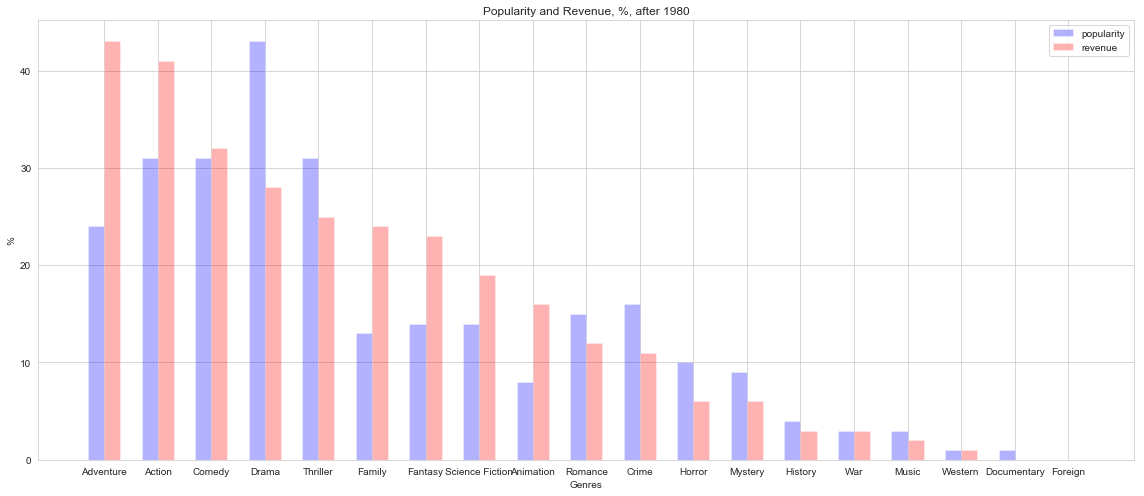

In [47]:
#Revenue and Popularity, %

rev_pop_list = sorted(zip(g_name, revenue, popularity), key = lambda x: x[1], reverse = True) # list of names along with revenues sorted
genre_values = [rev_pop_list[x][0] for x in range(len(rev_pop_list))]
pop_values = [rev_pop_list[x][2] for x in range(len(rev_pop_list))]
rev_values = [rev_pop_list[x][1] for x in range(len(rev_pop_list))]


# Bar Chart
fig, ax = plt.subplots(figsize=(16,7))
index = np.arange(len(genre_values))
bar_width = 0.3
opacity = 0.3

rects1 = ax.bar(index, pop_values, bar_width,
                alpha=opacity, color='b',
                label='popularity')

rects2 = ax.bar(index + bar_width, rev_values, bar_width,
                alpha=opacity, color='r',
                label='revenue')

ax.set_xlabel('Genres')
ax.set_ylabel('%')
ax.set_title('Popularity and Revenue, %, after 1980')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(genre_values)
ax.legend()

fig.tight_layout()
plt.show()